In [1]:
#import semua library yang dibutuhkan
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#membaca dataframe
data = pd.read_csv('GBcomments.csv', error_bad_lines=False)
data.head()

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [4]:
#mengecek ringkasan singkat dari dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718452 entries, 0 to 718451
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      718452 non-null  object
 1   comment_text  718424 non-null  object
 2   likes         718452 non-null  int64 
 3   replies       718452 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 21.9+ MB


In [5]:
#menampilkan 5 record dataframe
data.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [6]:
!pip install textblob

In [7]:
#install text blob untk menggunakan sentimen analisis
from textblob import TextBlob

In [ ]:
#kita bisa mencari kalimat sentiment on this particular comment 
#'Its more accurate to call it the M+(1000) be //bisa di copy
# i have to pass this comment in this textblob 
#dan tentukan macam dari sentimen tersebut/ what type of sentiment this comment has?
#this can call polarity sentiment 
TextBlob('Its more accurate to call it the M+ (1000) be...').sentiment.polarity
#bisa dilihat what exactly is a polarity of this one, just execute 


0.45000000000000007

In [ ]:
TextBlob('Its more accurate to call it the M+ (1000) be...').sentiment

Sentiment(polarity=0.45000000000000007, subjectivity=0.5666666666666667)

In [ ]:
TextBlob('What happened to the home button on the iPhone').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
#bisa dilihat bahwa it has polarity of somewhere zero pint four five
#similiarly, we can perform this sentiment analysis with respetc to each and every row


In [ ]:
#im going to check whether it has any null values or not in my data.
#to get summation of all the missing values available in our data.
data.isna().sum()

#this comment column hasnt many missing values

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [ ]:
#im going to drop all the missing values 
data.dropna(inplace=True)

In [ ]:
#I have to perform sentiment analysis on each and every row using looping 
polarity=[] #buat list kosong 
for i in data['comment_text']:
  polarity.append(TextBlob(i).sentiment.polarity)
  

In [ ]:
#insert all the polarities in dataframe (in comments dataframe). 
#define data frame and access 
data['polarity']=polarity #assign data exactly in polarities 

In [ ]:
#panggil data frame
data.head(10)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


In [ ]:
#we have a negative polarity from this particular comment  
""" conclusion 
we've basically performed sentiment analysis with respect to this comment text
we have some kind of polarities"""

NOW--- SECTION 2 |  EDA
perform EDA for the possitive sentences
perform EDA fro the negative sentences

In [ ]:
#we have to perform eda before the positive sentiment as well as for the negative sentiment as well.


In [ ]:
#first, i need postive polarity wherever the polarity is equally close to one.
#i have to create a filter over there and i have to pass this filter in dataframe 
#because i have to fetch that particulat data first and define that filter.

In [ ]:
comments_positive=data[data['polarity']==1]

In [ ]:
comments_positive.shape
#rules, and columns

(12882, 5)

In [ ]:
comments_positive.head()
#data yg sudah di filter degang polarity mendekati 1

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0.0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2.0,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1.0,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0.0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0.0,1.0


In [ ]:
#!pip install wordcloud

In [ ]:
#let's say to the slightest comment and a text feature 
#we're going to use the world cloud to what exatcly is a word
""" world cloud is basically a dead type of tool functionally, basically, whenever you understand
how important our word is in huge chunck of data. 
the more bigger the word is, the more important that word will be. install worldcloud """ 

In [ ]:
#import model wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
comments_positive['comment_text']

4         Power is the disease.  Care is the cure.  Keep...
26                  The best thing to ever happen to iPhone
80        Apple is always awesome \n\nhttps://youtu.be/r...
158       das a lot of edditing you have done there ... ...
175                             Welcome to the Scandiworld!
                                ...                        
451221             GO TEAM CANADA!...GO TEAM GREAT BRITAIN!
451224    Chilean guy’s name is Tomás Gonzalez, best gym...
451249                             Wishing you all the best
451269    Congratulations to you, I watch you tv!!!! I l...
451321    I just adore Alexander Campbell!  He is both a...
Name: comment_text, Length: 12882, dtype: object

In [ ]:
' '.join(comments_positive['comment_text']) #menampilkan semua isi ulasan 

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The best thing to ever happen to iPhone Apple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4 das a lot of edditing you have done there ... I like it :D Welcome to the Scandiworld! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂 LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!! the sonic air timer was perfect no 16 on trending impressive My daughters name is lacey <3 I'm 17 and can proudly say Moon Dreamers was one of my favourite shows! if I could subscribe to Dude Perfect a million times I would You guys should make dude perfect sceets To be a dude perfect member it is so awesome .... 

In [ ]:
total_comment=' '.join(comments_positive['comment_text'])

In [ ]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

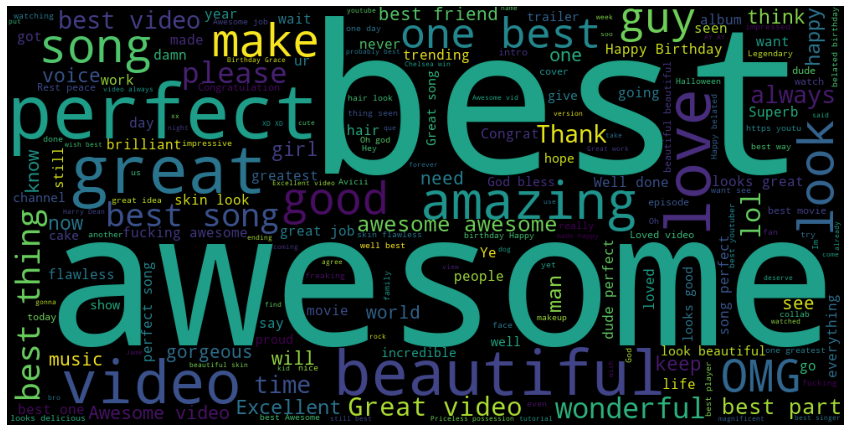

In [ ]:
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')

NEGATIVE COMMENTS

In [ ]:
comments_negative=data[data['polarity']==-1]

In [ ]:
total_comment=' '.join(comments_negative['comment_text'])

In [ ]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

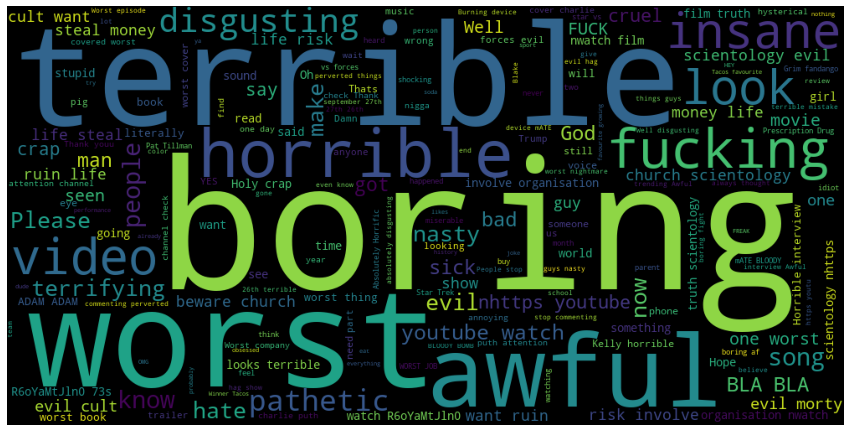

In [ ]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
""" conclusion ---
we've performed sentiment analysis as well as we have also performed exploaratory DA for the
negative and positive sentences as well. """


In [ ]:
NOW-- SECTION 3 | Analyze what are trending tags on Youtube!

In [ ]:
#first, read data 
videos = pd.read_csv('USvideos.csv', error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [ ]:
videos.head() #to preview how exatcly data frame looks like

In [ ]:
#exist this (tags's column)
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [ ]:
#i'm going to join all these tags to get a whole bunch of text in just string
tags_complete = ' '.join(videos['tags']) #giving space to join it basically 
#these are  particular dataset for this particular column

In [ ]:
tags_complete
#we have some kind of noise, lets say you have some kind of some special colletctor's data
#we have to remove those.

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [ ]:
#first, we have to import a module which is my Audi, exactly regular expression module will be handy
#whenever you have to deal with some kind of text data from this audi,
#you have to use substitute(mengganti) function 

import re


In [ ]:
tags = re.sub('[^a-zA-Z]',' ', tags_complete)
#a part from a to z and capital A to Z, whatever i have just replace with a space. 
#Which data i have to perform it (tags_complete)

In [ ]:
tags #execute
#we have some kind of extrs spacing 
#we have eliminate this extra spacing 

In [ ]:
#extra spacing removes it with one space
tags = re.sub(' +',' ',tags)


In [ ]:
#create wordcloud 
#use parameter which is exactly stopwards, stopwords are nothing but my set of whatever is stopwords
# class i have
#and i hve to call generate because i hve to generate my wordcloud 
#and i have to set some custom parameters which is width =the word of my wordcloud, height =500
wordcloud = WordCloud(width=1000, height = 500, stopwords=set(STOPWORDS)).generate(tags)

In [ ]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off') #disable sumbu grafiknya

In [ ]:
""" conclusion | 
we can see, there are music video, makeup tutorial, funny video and all these kind of things
that are definitely tranding tags on youtube."""
#FYI : ini tagline youtube US yak, di Indonesia kita coba nantiii----

Perform Analysis on likes, views and dislikes and how they are co-relateted each other

In [ ]:
"""Basically, im going to use a regression plot, bcs whenever you find some relations between two variables
regression plot will be handy in this type of scenario. So for this, im going to use the regression plot that is
a function in seaborn"""

Text(0.5, 1.0, 'Regression Plot for views and likes')

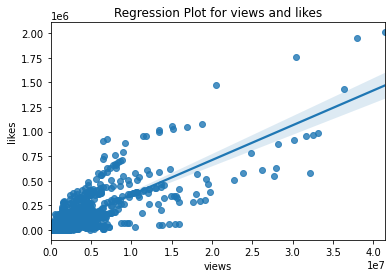

In [ ]:
sns.regplot(data=videos, x='views', y='likes') #view dan likes dari data videos 
plt.title("Regression Plot for views and likes")

Text(0.5, 1.0, 'Regression Plot for views and dislikes')

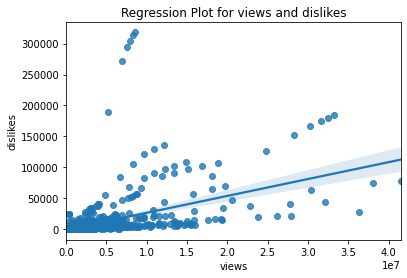

In [ ]:
sns.regplot(data=videos, x='views', y='dislikes') #view dan likes dari data videos 
plt.title("Regression Plot for views and dislikes")

In [ ]:
""" conclusion
whenever the views are increasing, your like also increase 
whenever your views are increasing, your dislikes are not increasing that much.
so that's the type of influence you can fetch from the data"""

In [ ]:
""" that's an insight you can draw from your data, lets say we have to draw a correlation matrix
to know how they are co-related each other."""
#2 axis values 
df_corr = videos[['views', 'likes', 'dislikes']]

In [ ]:
df_corr

In [ ]:
df_corr.corr()

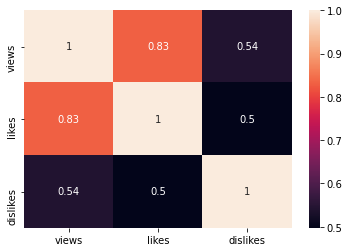

In [ ]:
sns.heatmap(df_corr.corr(), annot=True)

In [ ]:
""" views and likes have the highest correlation 
because likes versus likes and dislikes or dislike make no sense at all."""

PERFORM EMOJI'S ANALYSIS

In [ ]:
data.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0.0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0.0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0.0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0.0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0.0,1.00


In [ ]:
data['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [ ]:
print("\U0001F600")

In [ ]:
#import libaray
!pip install emoji

In [ ]:
import emoji

In [ ]:
#check panjang komentar
len(data)

451334

In [ ]:
#extract emoji 
emo = data['comment_text'][1]

In [ ]:
[c for c in emo if c in emoji.UNICODE_EMOJI]

[]

CUTTT------